In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from pycocotools.coco import COCO
import numpy as np
import matplotlib.pyplot as plt
import cv2

#data set paths
imgDir = 'images/val2014/'
annFile= 'annotations/person_keypoints_val2014.json'

#load dataset annotations
coco=COCO(annFile)

# Select an image
imgID = 257

# Image information
img = coco.loadImgs(imgID)[0]
print ('\nImage information:\n',img)

# Annoation data
annID = coco.getAnnIds(imgIds=imgID)
anns = coco.loadAnns(annID)
print ('\nAnnotation data:\n', anns[0].keys())

# Image data
cvimg = cv2.imread(imgDir+img['file_name'])
cvimg = cv2.cvtColor(cvimg, cv2.COLOR_BGR2RGB)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!

Image information:
 {'license': 5, 'file_name': 'COCO_val2014_000000000257.jpg', 'coco_url': 'http://mscoco.org/images/257', 'height': 480, 'width': 640, 'date_captured': '2013-11-17 16:42:45', 'flickr_url': 'http://farm8.staticflickr.com/7452/8930538048_7327c97c81_z.jpg', 'id': 257}

Annotation data:
 dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id', 'keypoints', 'num_keypoints'])


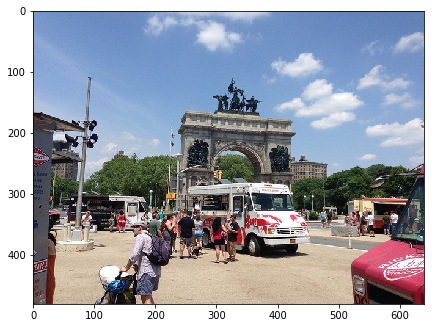

In [3]:
# Original image
plt.figure(figsize = (7,7));plt.imshow(cvimg)

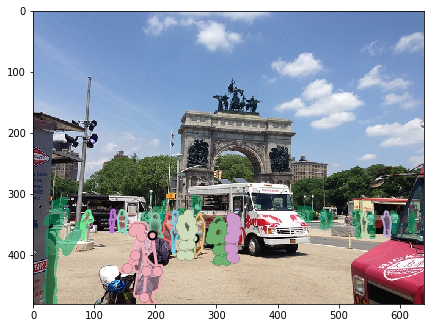

In [4]:
# All annotations
plt.figure(figsize = (7,7));plt.imshow(cvimg)
coco.showAnns(anns)

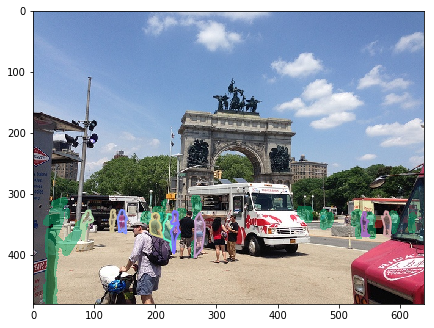

In [5]:
# Annotations without keypoints
plt.figure(figsize = (7,7));plt.imshow(cvimg)
filtered_anns = [ann for ann in anns if ann['num_keypoints'] == 0]
coco.showAnns(filtered_anns)

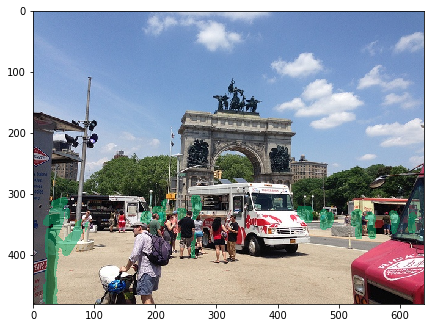

In [6]:
# Annotations without keypoints and is crowd
plt.figure(figsize = (7,7));plt.imshow(cvimg)
filtered_anns = [ann for ann in anns if ((ann['iscrowd']==1) and (ann['num_keypoints']==0))]
coco.showAnns(filtered_anns)
